instalando o pandas por meio do `pip` e importando ele, renomeando para 'pd'

In [32]:
#!pip install pandas

In [33]:
import pandas as pd

importando a base que sera utilizada 

In [34]:
base_treino = pd.read_csv("train.csv")

## Analise dos dados

Nesta secao nos analisaremos os dados, desde o valores faltantes, os tipos e outliers

Utilizamos de metodos estatisticos para analisarmos as colunas, como divisão de quartis e media. Graficos tambem sao muito 
bem vindos nesta parte.

In [35]:
base_treino

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


utilizamos a funcao `info` para analizaramos a quantidade de valores não nulos da tabela e os seus tipos de dados

In [36]:
base_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [37]:
for col in base_treino.columns:
    nulos = base_treino[col].isnull().sum()
    print(f'numero de valores nulos na coluna {col} é: {nulos}')

numero de valores nulos na coluna PassengerId é: 0
numero de valores nulos na coluna Survived é: 0
numero de valores nulos na coluna Pclass é: 0
numero de valores nulos na coluna Name é: 0
numero de valores nulos na coluna Sex é: 0
numero de valores nulos na coluna Age é: 177
numero de valores nulos na coluna SibSp é: 0
numero de valores nulos na coluna Parch é: 0
numero de valores nulos na coluna Ticket é: 0
numero de valores nulos na coluna Fare é: 0
numero de valores nulos na coluna Cabin é: 687
numero de valores nulos na coluna Embarked é: 2


A funcao `describe` exibe, para cada coluna, quantos valores não nulos, a media, o desvio padrao, o menor valor, o 1, 2 e 3 quartis e o maior valor

In [38]:
base_treino.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Exclusão de colunas

Aqui nos retiramos as colunas que não nos interessam. Sao aqueles que nao fazem parte do nosso dominio de problema

Utilizando a funcao `drop` nos removemos as colunas.

Vale ressaltar que as funcoes que alteram a base normalmente criam uma copia, ou seja, **nao altera o original**. Para alterarmos ele
precisamos utilizar o parametro `inplace=True`.

In [39]:
base_treino.drop(columns=['Name', 'Ticket', 'Cabin', 'Embarked', 'PassengerId'], inplace=True)

In [40]:
base_treino

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


## Tratamento da base

Dentro desta secao nos modificamos os valores da base para posteriormente aplicarmos o modelo. Essas alteracoes envolvem
a imputacao de valores nulos e a codificacao de atributos

No bloco abaixo nos aplicamos o valor da media da idade para o atributo `media_idade`

In [41]:
media_idade = round(base_treino['Age'].mean())
print(media_idade)

30


Ja nesse bloco nos aplicamos esse valor da media nos valores que sao nulos.

In [42]:
base_treino['Age'].fillna(value=media_idade, inplace=True)

### Codificação dos atributos

In [43]:
# !pip install sklearn

In [44]:
from sklearn.preprocessing import LabelEncoder

A funcao `LabelEncoder` codifica os valores de um atributo. Essa codificacao passa os atributos textuais para numericos de 
forma automatica.

**Ex:** Em uma coluna que informa o sexo temos os valores Homem e Mulher, peo motivo da palavra Homem vir primeiro na ordem do alfabeto
ele recebe o valor zero, ja mulher e substituido por 1.

In [45]:
base_treino['Sex'] = LabelEncoder().fit_transform(base_treino['Sex'])

#### Outra forma

In [46]:
# base_treino.loc[base_treino['Sex'] == 'Homem'] == 0
# base_treino.loc[base_treino['Sex'] == 'Mulher'] == 1

## Separação dos valores de treino e teste 

Nessa ultima parte nos vamos aplicar o modelo. Os modelos sao divididos em duas categorias, os modelos de classificacao e 
previsao.

Modelos categoricos precisam du um atributo para preverem, eles categorizam uma instancia com base nos outros atributos e comparam com o valor real
para que assim possa informar o quanto ele acertou.

Ja os modelos de previsao utilizam os atributos de uma base para prever um valor, podendo estar certo ou nao.

neste codigo abordamos a arvore de decisao, um modelo categorico

In [47]:
from sklearn.model_selection import train_test_split

Por meio da funcao `train_test_split` se e separado 2 grupos de valores, os de treino, que vao ser utilizados para treinar o modelo, e os de teste, que vao comprovar a eficacia do modelo.

Nesta funcao temos alguns parametros, no primeiro passamos a base **sem o atributo classe**, aquele que queremos prever, no segundo passamos o atributo classe.

Alem disso tempos o parametro _`test_size`_ que separa, em porcentagem, uma parte da base para o treino. No exemplo a baixo temos 25% da base reservado para treino

o ultimo paramentro e o _`random_state`_ que, quando fixo como no exemplo abaixo, mantem fixo a aleatoridade da escolha de treino e teste 

In [48]:
X_treino, X_teste, y_treino, y_teste = train_test_split(base_treino.drop(columns=['Survived']), base_treino['Survived'], test_size=0.25, random_state=42)

In [49]:
from sklearn.tree import DecisionTreeClassifier

Atribuimos o modelo de arvore para o atributo `modelo`

Neste modelo de arvore temos que o criterio de decisao sera Gini(algo que voces nao precisam explorar ainda) e que a profundidade 
maxima da arvore sera 4

Apos estas definicoes e passado para o modelo os atributos de treino, aqueles que serao utilizados para classificar a instancia, e o valor correto
de classificacao, para ele comparar e aprender o qual certo ele esta

In [ ]:
modelo = DecisionTreeClassifier(criterion='gini', max_depth=4)
modelo.fit(X_treino, y_treino)

DecisionTreeClassifier(max_depth=5)

No tercho abaixo passamos a base de teste para que ele faca classificacoes sem saber se esta certo ou nao

In [51]:
previsoes = modelo.predict(X_teste)

A partir deste ponto e utilizado funcoes para comprovarmos a eficacia do modelo, observamos a acuracia e observamos os erros do modelo

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # type: ignore
accuracy_score(y_teste,previsoes)

0.8026905829596412

In [53]:
from yellowbrick.classifier import ConfusionMatrix # type: ignore
confusion_matrix(y_teste, previsoes)

array([[120,  14],
       [ 30,  59]])

/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8026905829596412

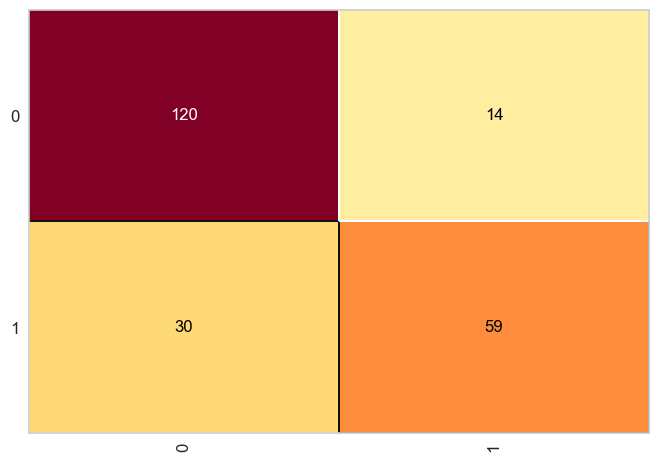

In [54]:
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

In [55]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       134
           1       0.81      0.66      0.73        89

    accuracy                           0.80       223
   macro avg       0.80      0.78      0.79       223
weighted avg       0.80      0.80      0.80       223



O ultimo trecho nos apenos criamos uma visualizacao grafica da base

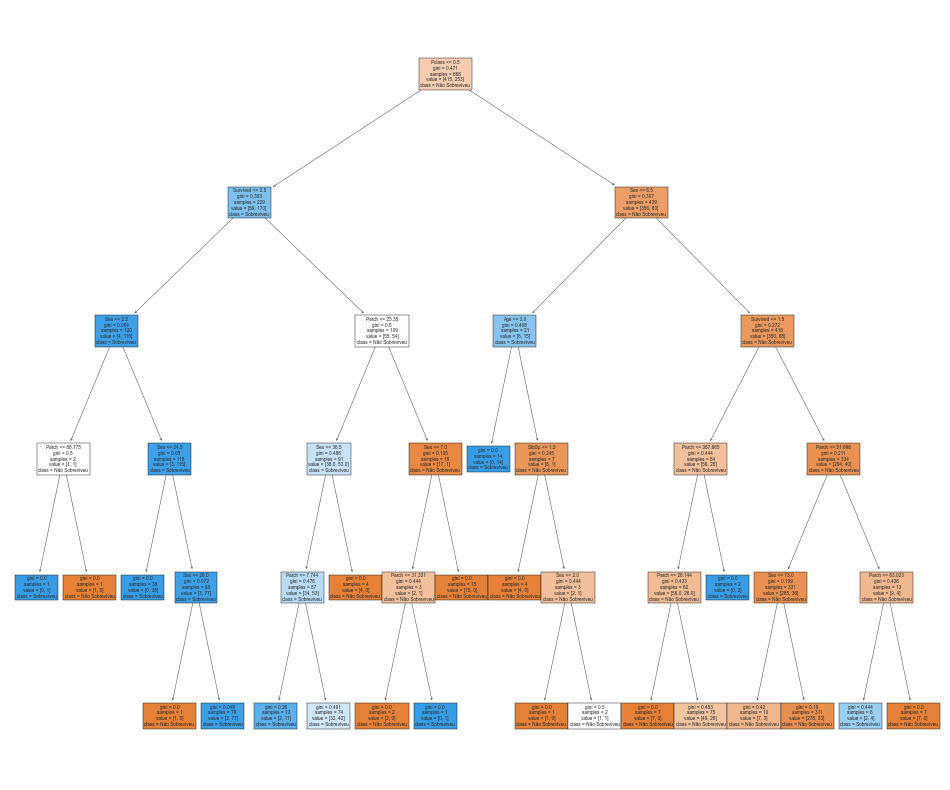

In [56]:
from sklearn import tree
import matplotlib.pyplot as plt
previsores = base_treino.columns
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(12,10))
tree.plot_tree(modelo, feature_names=previsores, class_names = ['Não Sobreviveu', 'Sobreviveu'], filled=True);
plt.savefig("modelo_arvore.png", dpi=600)